In [429]:
conda install tensorflow

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [39]:

import pandas as pd
from sklearn.preprocessing import MinMaxScaler


In [91]:
data = pd.read_csv('kubernetes_pod_container_kibana_test.csv', header=0)
data

,Unnamed: 0,time,pod_name,mean_cpu_usage_nanocores,mean_memory_working_set_bytes
0,167,1688747400000000000,kibana-kibana-5d996f756d-f9pwp,6.788895e+07,8.346188e+08
1,1223,1688745600000000000,kibana-kibana-5d996f756d-f9pwp,6.844625e+07,8.351916e+08
2,2282,1688743800000000000,kibana-kibana-5d996f756d-f9pwp,7.030888e+07,8.371558e+08
3,3344,1688742000000000000,kibana-kibana-5d996f756d-f9pwp,7.236433e+07,8.363353e+08
4,4407,1688740200000000000,kibana-kibana-5d996f756d-f9pwp,6.957308e+07,8.363241e+08
...,...,...,...,...,...
331,348899,1688151600000000000,kibana-kibana-5d996f756d-f9pwp,6.180322e+07,8.358393e+08
332,349949,1688149800000000000,kibana-kibana-5d996f756d-f9pwp,7.054554e+07,8.350105e+08
333,351003,1688148000000000000,kibana-kibana-5d996f756d-f9pwp,6.699763e+07,8.343007e+08
334,351991,1688146200000000000,kibana-kibana-5d996f756d-f9pwp,6.715822e+07,8.325368e+08


In [41]:
# data['time'] = pd.to_datetime(data['time'], unit='ns')
# data = data.loc[data.pod_name == 'drive-az2-prd-69cbb999bc-lpr67']
# date_time = pd.to_datetime(data['time'], format='%Y-%M-%D %H:%M:%S')

In [92]:

data = data.loc[:,['time', 'pod_name', 'mean_cpu_usage_nanocores', 'mean_memory_working_set_bytes']]
data_scaled = pd.DataFrame(data, columns=['mean_cpu_usage_nanocores'])
# data_scaler['mean_cpu_usage_nanocores', 'mean_memory_working_set_bytes'] = data['mean_cpu_usage_nanocores', 'mean_memory_working_set_bytes']
data_scaled

,mean_cpu_usage_nanocores
0,6.788895e+07
1,6.844625e+07
2,7.030888e+07
3,7.236433e+07
4,6.957308e+07
...,...
331,6.180322e+07
332,7.054554e+07
333,6.699763e+07
334,6.715822e+07


In [93]:
# data.loc[:, ['mean_cpu_usage_nanocores', 'mean_memory_working_set_bytes']]
mms = MinMaxScaler()
data_scaled = mms.fit_transform(data_scaled)


In [94]:
data_scaled_df = pd.DataFrame(data_scaled, columns=['mean_cpu_usage_nanocores'])
data_scaled_df

,mean_cpu_usage_nanocores
0,0.322788
1,0.333717
2,0.370246
3,0.410556
4,0.355816
...,...
331,0.203438
332,0.374887
333,0.305308
334,0.308457


In [95]:
data['mean_cpu_usage_nanocores'] = data_scaled_df['mean_cpu_usage_nanocores']
# data['mean_memory_working_set_bytes'] = data_scaler[:, 1]
data

,time,pod_name,mean_cpu_usage_nanocores,mean_memory_working_set_bytes
0,1688747400000000000,kibana-kibana-5d996f756d-f9pwp,0.322788,8.346188e+08
1,1688745600000000000,kibana-kibana-5d996f756d-f9pwp,0.333717,8.351916e+08
2,1688743800000000000,kibana-kibana-5d996f756d-f9pwp,0.370246,8.371558e+08
3,1688742000000000000,kibana-kibana-5d996f756d-f9pwp,0.410556,8.363353e+08
4,1688740200000000000,kibana-kibana-5d996f756d-f9pwp,0.355816,8.363241e+08
...,...,...,...,...
331,1688151600000000000,kibana-kibana-5d996f756d-f9pwp,0.203438,8.358393e+08
332,1688149800000000000,kibana-kibana-5d996f756d-f9pwp,0.374887,8.350105e+08
333,1688148000000000000,kibana-kibana-5d996f756d-f9pwp,0.305308,8.343007e+08
334,1688146200000000000,kibana-kibana-5d996f756d-f9pwp,0.308457,8.325368e+08


In [96]:
data.max()
# data['mean_cpu_usage_nanocores'] = data['mean_cpu_usage_nanocores'] 
# data


time                                        1688747400000000000
pod_name                         kibana-kibana-5d996f756d-f9pwp
mean_cpu_usage_nanocores                                    1.0
mean_memory_working_set_bytes                       845981491.2
dtype: object

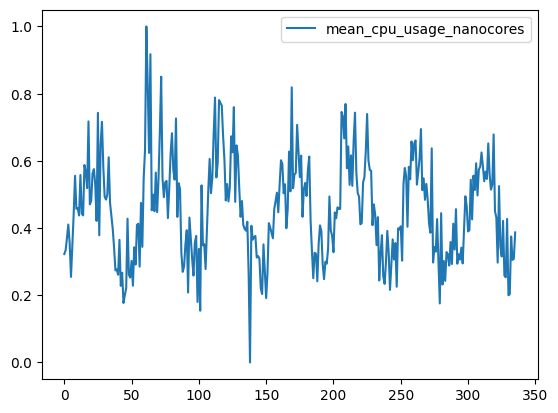

In [97]:
plot_cols = ['mean_cpu_usage_nanocores']
plot_features = data[plot_cols] 
# plot_features.index = date_time
_ = plot_features.plot(subplots=True)

# plot_features = data[plot_cols][:1440]
# plot_features.index = date_time[:1440]
# _ = plot_features.plot(subplots=True)

In [98]:
data.to_csv('kubernetes_pod_container_kibana_test_scaled.csv')